<i><b>Public AI</b></i>
<br>
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 1. DNN Basis**
# Appendix 1. Weight Initialization

### _Objective_
1. **신경망이 깊어짐에 따라 발생하는 문제**: 신경망이 깊어짐에 따라 발생하는 Gradient Vanishing과 Gradient Exploding에 대해 배워보도록 하겠습니다. <br>
2. **Weight Initialization** : 가중치를 왜 랜덤으로 초기화해야 하는지와 그 방법에 대해 알아봅니다.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# \[ 1. 신경망이 깊어짐에 따라 발생하는 문제 \]

신경망은 깊어질수록, 신경망을 학습시키기가 어려워집니다. 깊어질수록 Gradient가 사라지는 Vanishing 문제 혹은 Gradient가 지나치게 커지는 Exploding 문제가 발생하기 때문입니다.

## 1. 순전파 과정 수식 일반화 하기

<img src="https://i.imgur.com/ZHZHpAyl.png" width="600" height="450"/>

위 신경망을 수식으로 풀면 아래와 같습니다.

$$
a^{0} = X\\
Z^1 = a^{0}\cdot W^{[1]} + b^{[1]}\\
a^1 = \sigma(Z^1)\\
Z^2 = a^{0}\cdot W^{[2]} + b^{[2]}\\
a^2 = \sigma{Z^2}
$$

위의 반복적인 과정을 일반화해서 나타내면, 아래의 관계가 나타납니다.

$$
Z^{i+1} = a^{i}\cdot W^{[i+1]} + b^{[i+1]}\\
a^{i+1} = \sigma(z^{i+1})
$$

## 2. 순전파 과정에서의 Vanishing과 Exploding

계산상의 편의를 위해 순전파 과정에서 활성화 함수($\sigma$)와 Bias($b$)가 없다고 가정해보겠습니다. 그렇다면, 각층의 로짓값($Z$)는 아래의 관계를 가지고 있습니다.

$$ Z^{i+1} = X\cdot W^{[1]}\cdot W^{[2]}... \cdot W^{[i+1]} $$

X의 값이 아래와 같을 때, 주어진 W의 값에 따라 어떻게 변화하는지 살펴보겠습니다.

$$
X = \begin{bmatrix}
0.8 \\
0.2 \\
\end{bmatrix}
$$


### (1) Weight의 원소 값이 1보다 클 때

${W}$의 값이 아래와 같이 1보다 클 때, 순전파 과정을 50번 진행하였을 때 Z의 값은 어떻게 갱신될까요? <br>
이를 갱신된 Z의 0번째, 10번째, 20번째, 30번째, 40번째 값을 통해 살펴보겠습니다.

$$
{W}_{} = \begin{bmatrix}
1.2 & 0 \\
0 & 1.2 \\
\end{bmatrix}
$$

In [3]:
X = np.array([[0.8,0.2]])
W = np.array([[1.2,0.],[0.,1.2]])

Z = X
for i in range(50):
    Z = np.dot(Z, W)
    if i % 10 == 0:
        print("Z의 {}번째 값 : {}".format(i,Z))

Z의 0번째 값 : [[0.96 0.24]]
Z의 10번째 값 : [[5.94406697 1.48601674]]
Z의 20번째 값 : [[36.80409593  9.20102398]]
Z의 30번째 값 : [[227.88126125  56.97031531]]
Z의 40번째 값 : [[1410.98070525  352.74517631]]


초기 X값은 모두 0과 1사이에 위치하였는데 weight의 원소 값이 1보다 클 때는 로짓값이 기하급수적으로 증가(exploding)하는 것을 확인할 수 있습니다.

### (2) Weight의 원소 값이 1보다 클 때

이번에는 ${W}$의 값이 1보다 작을 때 순전파 과정을 50번 진행해보겠습니다. Z의 값은 어떻게 갱신될까요? <br>
이를 갱신된 Z의 0번째, 10번째, 20번째, 30번째, 40번째 값을 통해 살펴보겠습니다.

$$
{W} = \begin{bmatrix}
0.8 & 0 \\
0 & 0.8 \\
\end{bmatrix}
$$

In [4]:
X = np.array([[0.8,0.2]])
W = np.array([[0.8,0.],[0.,0.8]])

Z = X
for i in range(50):
    Z = np.dot(Z, W)
    if i % 10 == 0:
        print("Z의 {}번째 값 : {}".format(i,Z))

Z의 0번째 값 : [[0.64 0.16]]
Z의 10번째 값 : [[0.06871948 0.01717987]]
Z의 20번째 값 : [[0.0073787  0.00184467]]
Z의 30번째 값 : [[0.00079228 0.00019807]]
Z의 40번째 값 : [[8.50705917e-05 2.12676479e-05]]


weight의 원소 값이 1보다 작을 때는 로짓값이 0에 수렴(vanishing)하는 것을 확인할 수 있습니다.

<hr>
위와 같은 gradient exploding과 gradient vanishing 현상은 순전파 과정 뿐만아니라 전파되는 error값에 weight가 반복적으로 곱해지는 역전파 과정에서도 동일하게 발생합니다. 이를 계산그래프를 통해 확인해보겠습니다.

<img src="https://i.imgur.com/iQvVNOn.png" width="400" height="300"/>

초기 weight에 따라 gradient가 exploding하거나 vanishing하는 문제가 발생하지 않도록 하기 위해 초기 weight설정이 매우 중요합니다.

# \[ 2. Weight Initialization\]

초기 Weight을 잘 설정해줌으로써 모델이 학습할 때, Gradient Vanishing 혹은 Gradient Exploding 문제가 발생하지 않도록 방지할 수 있습니다. 이에 대한 방법으로 Xavier 초기화와 He 초기화가 있습니다.

## 1. Xavier 초기화

### (1) 좋은 초기화의 조건

심층 신경망은 여러 층으로 이루어진 로짓 계산과 활성화 함수를 반복적으로 거침으로써 계산됩니다. <br>
층을 반복하더라도 활성화 값의 분포가 비슷하기 위해서는 아래의 조건이 필요합니다.

$$
z^{[i+1]} = w_1^{[i+1]}x_1^{[i]}+w_2^{[i+1]}x_2^{[i]}+...+w_n^{[i+1]}x_n^{[i]} \mbox{일 때,}\\
Var(z^{[i+1]}) = Var(x^{[i]})
$$


### (2) Xavier 초기화 유도

층의 입력 분포와 층의 출력 분포의 분산이 동일하게 하는 것이 우리의 목표입니다.<br>
입력값과 가중치가 정규분포를 따르고, 각각 평균이 0이라고 가정한다면, 아래와 같이 수식을 계산할 수 있습니다.<br>

$$
Var(z) = \sum^{n}_{i=1}Var(w_ix_i)\\
= \sum^{n}_{i=1}[E(x_i)]^2var(w_i) + [E(w_i)]^2var(x_i)+Var(w_i)Var(x_i)\\
= \sum^{n}_{i=1}Var(w_i)Var(x_i)\\
= nVar(w)Var(x)
$$

좋은 초기화를 위해 우리는 $Var(z) = Var(x)$를 목적으로 하므로, 이를 만족하는 $Var(w)$는 아래와 같습니다.

$$
Var(w) = \frac{1}{n}
$$

### (3) Xavier 초기화 효과

위에서 유도한 `Xavier 초기화`의 효과를 확인하기 위해 활성화 함수로 `sigmoid`를 사용하는 20층 feed-forward network를 구성하고 각 층 별 출력값의 분포를 살펴보겠습니다.

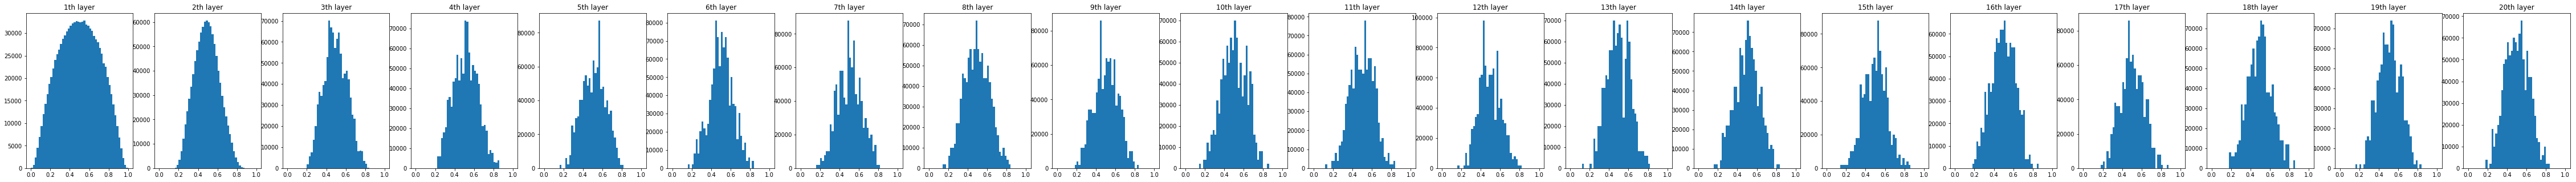

In [6]:
def sigmoid(x):
    return 1 / (1+np.exp(-x))

num_data = 2000
unit_num = 512
num_layer = 20

X = np.random.randn(num_data, unit_num) 

history = []
a = X
for i in range(num_layer):
    W = np.random.normal(scale=np.sqrt(1/unit_num),
                         size=(unit_num,unit_num))
    z = np.dot(a,W)
    a = sigmoid(z)
    history.append(a.copy())
    
plt.figure(figsize=(80,5))
for idx, value in enumerate(history):
    plt.subplot(1, num_layer, idx+1)
    plt.title("{}th layer".format(idx+1))
    plt.hist(value.flatten(),50,range=(0,1))
plt.show()

순전파 과정 중에서도 층 별 출력 값의 분포가 크게 변화하지 않음을 볼 수 있습니다. <br>
Xavier 방식은 간단한 방법으로 출력값을 비슷하게 맞추어주는 효과가 있습니다.

### (4) Relu에서의 Xavier 초기화 효과

`Xavier 초기화`를 사용해 (3)에서 사용한 `sigmoid`와 달리 활성화 함수로 `relu`를 사용하는 20층 feed-forward network의 층별 분포를 살펴보겠습니다.

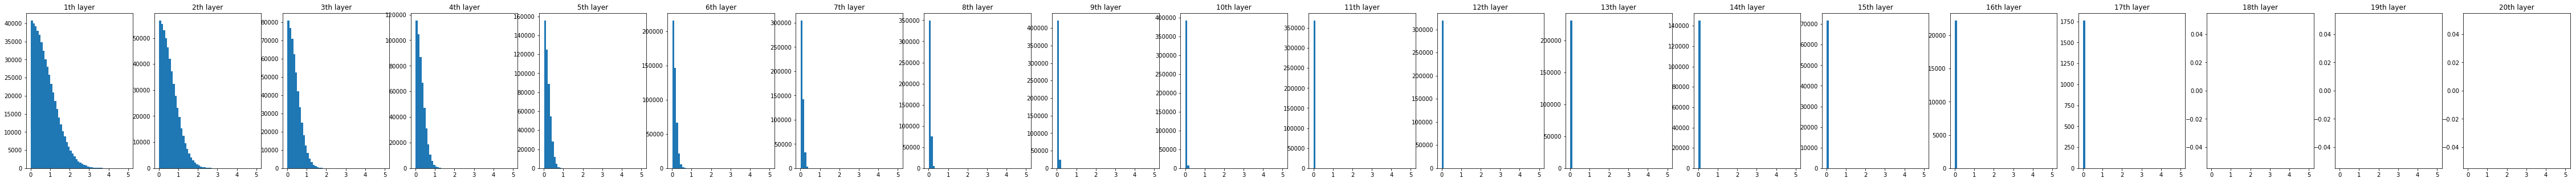

In [7]:
def relu(x):
    return np.maximum(x,0)

num_data = 2000
unit_num = 512
num_layer = 20

X = np.random.randn(num_data, unit_num) 

history= []
a = X
for i in range(num_layer):
    W = np.random.normal(scale=np.sqrt(1/unit_num),
                         size=(unit_num,unit_num))
    z = np.dot(a,W)
    a = relu(z)
    history.append(a.copy())
    
plt.figure(figsize=(80,5))
for idx, value in enumerate(history):
    plt.subplot(1, num_layer, idx+1)
    plt.title("{}th layer".format(idx+1))
    plt.hist(value.flatten(),50,range=(0.01,5))
plt.show()

활성화 함수로 relu 함수를 이용할 경우, Xavier 초기화를 해주었음에도 불구하고 아래와 같이 출력값의 분포가 계속 줄어들며 전달되면 정답입니다. <br>
출력값의 분포가 계속 줄어드는 문제는 relu의 형태에 기인한 문제입니다.

## 2. He 초기화

### (1) He 초기화

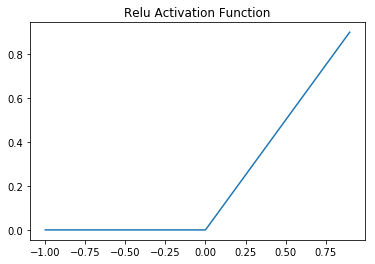

In [17]:
xs = np.arange(-1,1,0.1)
ys = relu(xs)

plt.title("Relu Activation Function")
plt.plot(xs,ys)
plt.show()

위 Relu 함수 그래프를 보면, Relu 함수는 강제적으로 입력 값이 0이하의 값들을 0으로 바꾸어버립니다. <br>
이렇기 때문에 값의 분산이 줄어드는 효과가 발생해 Xavier 초기화를 했을 때 문제가 발생한 것입니다.<br>
이를 보정하기 위해서 Xavier의 가중치 값의 분포에 2배를 곱하는 식으로 진행됩니다.

$$
Var(w) = \frac{2}{n}
$$

위의 수식을 허(He) 초기화라고 부릅니다.

### (2) He 초기화 효과

위의 `He 초기화`를 사용해 활성화 함수로 `relu`를 사용하는 20층 feed-forward network의 층별 분포를 확인해보겠습니다.

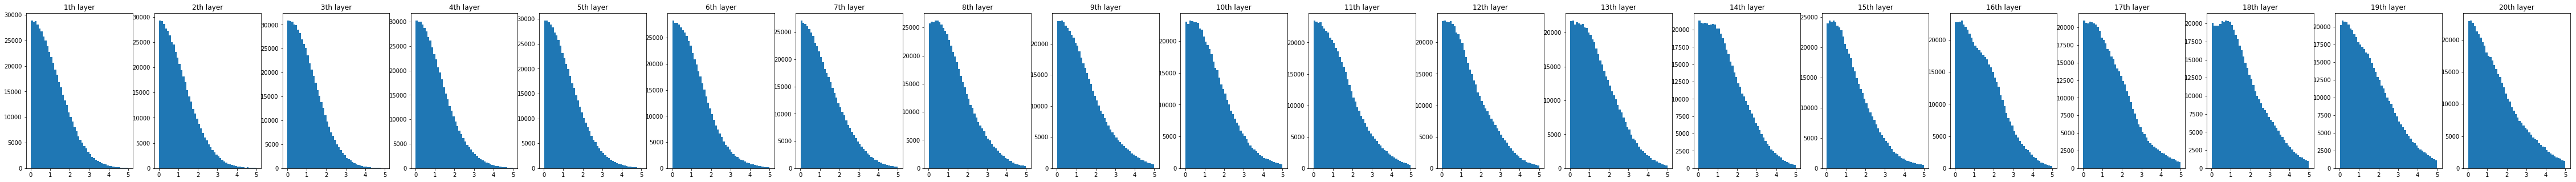

In [8]:
def relu(x):
    return np.maximum(x,0)

num_data = 2000
unit_num = 512
num_layer = 20

X = np.random.randn(num_data, unit_num) 

history= []
a = X
for i in range(num_layer):
    W = np.random.normal(scale=np.sqrt(2/unit_num),
                         size=(unit_num,unit_num))
    z = np.dot(a,W)
    a = relu(z)
    history.append(a.copy())
    
plt.figure(figsize=(80,5))
for idx, value in enumerate(history):
    plt.subplot(1, num_layer, idx+1)
    plt.title("{}th layer".format(idx+1))
    plt.hist(value.flatten(),50,range=(0.01,5))
plt.show()

활성화 함수가 relu 함수인 경우 He 초기화를 적용했을 때, Xavier 초기화와 달리 출력값의 분포가 크게 변하지 않으며 전달되는것을 확인할 수 있습니다.

#  

<hr>
<div>
    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, DoYeong Kim ( ka2k@publicai.co.kr )  last updated on 2019/10/07
</div>
<hr>